In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from scipy import stats


# В нашей игре проводился А/В тест. Каждый игрок был распределен в одну из групп (контрольная или тестовая) и получил идентификатор 0 или 1 соответственно. В тесте мы хотели проверить гипотезу о том, что изменения в тестовой группе положительно повлияют на денежные показатели: ARPU, ARPPU и конверсию. Проведите анализ А/В теста. Данные можно по ссылке. Данные содержат следующие поля:
	• geo_country - страна игрока
	• test_timestamp - дата, когда игрок попал в тест
	• user_revenue - выручка с игрока
	• user_payments - количество платежей игрока
	• user_id - идентификатор игрока
test_group - идентификатор группы теста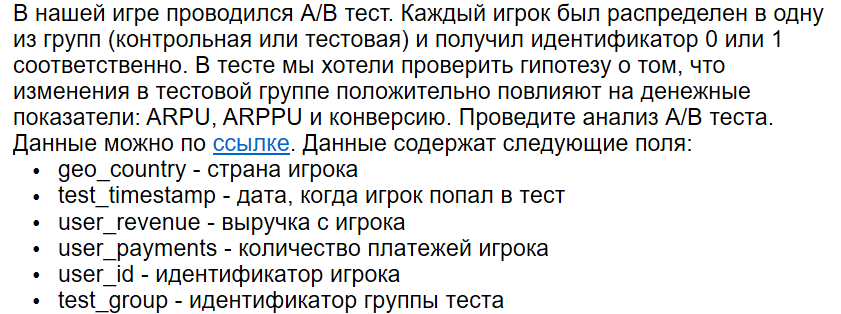

От себя хочу добавить, что было бы клево вначале провести АА тест, чтобы удостовериться, что группы были похожими до AB теста

In [2]:
#path - ваш путь к файлу
path = 'C:/Users/AUTODESK/Desktop/D/data.csv'
df = pd.read_csv(path)

In [3]:
df.head(10)

,geo_country,test_timestamp,user_revenue,user_payments,user_id,test_group
0,Russia,2021-05-03 19:06:06.325,NaN,0,6d696b2e-f236-45b1-b770-5530b2a3b3cf,0
1,India,2021-05-04 17:13:35.877,NaN,0,3ae8cd76-14ef-4e47-99c9-637e9260205e,0
2,Russia,2021-05-01 01:56:49.796,1.223728,1,0bf7d591-a052-44a2-97a5-161791fb440d,0
3,Kazakhstan,2021-05-03 04:17:25.337,NaN,0,5f8a3459-e85d-451e-8f93-0c17664c70da,0
4,Switzerland,2021-05-20 10:49:18.064,NaN,0,f2ea93ed-b9c6-4d8b-88d0-7717f8931988,0
5,United States,2021-05-18 19:48:37.893,NaN,0,ae73b6ae-37f5-455a-b719-9785dc72a4d0,0
6,New Zealand,2021-05-21 08:20:04.181,NaN,0,247e1093-5d50-40d3-8926-52fbcfae83ff,0
7,Thailand,2021-05-01 15:18:43.732,NaN,0,2c198ced-6230-4fb5-acec-9357a584eebe,0
8,United States,2021-05-05 04:19:52.304,NaN,0,06ce51b6-009c-422e-96c8-a2b14eda84c4,0
9,Lithuania,2021-05-07 09:54:18.423,NaN,0,7fbfbc2e-4b56-4d2e-8f40-8145c0786805,0


In [4]:
#Меняю nan на 0
df.replace(np.nan, 0, inplace=True)

In [5]:
df.head(10)

,geo_country,test_timestamp,user_revenue,user_payments,user_id,test_group
0,Russia,2021-05-03 19:06:06.325,0.000000,0,6d696b2e-f236-45b1-b770-5530b2a3b3cf,0
1,India,2021-05-04 17:13:35.877,0.000000,0,3ae8cd76-14ef-4e47-99c9-637e9260205e,0
2,Russia,2021-05-01 01:56:49.796,1.223728,1,0bf7d591-a052-44a2-97a5-161791fb440d,0
3,Kazakhstan,2021-05-03 04:17:25.337,0.000000,0,5f8a3459-e85d-451e-8f93-0c17664c70da,0
4,Switzerland,2021-05-20 10:49:18.064,0.000000,0,f2ea93ed-b9c6-4d8b-88d0-7717f8931988,0
5,United States,2021-05-18 19:48:37.893,0.000000,0,ae73b6ae-37f5-455a-b719-9785dc72a4d0,0
6,New Zealand,2021-05-21 08:20:04.181,0.000000,0,247e1093-5d50-40d3-8926-52fbcfae83ff,0
7,Thailand,2021-05-01 15:18:43.732,0.000000,0,2c198ced-6230-4fb5-acec-9357a584eebe,0
8,United States,2021-05-05 04:19:52.304,0.000000,0,06ce51b6-009c-422e-96c8-a2b14eda84c4,0
9,Lithuania,2021-05-07 09:54:18.423,0.000000,0,7fbfbc2e-4b56-4d2e-8f40-8145c0786805,0


In [6]:
#Проверка системы сплитования
df.groupby('test_group').user_id.nunique()

test_group
0    45400
1    45600
Name: user_id, dtype: int64

In [7]:
df_not_paying = df[df.user_payments == 0]
print("""Количество неплатящих пользователей по группам

""",df_not_paying.groupby('test_group').user_id.nunique())
print(" ")
df_paying = df[df.user_payments != 0]
print("""Количество платящих пользователей по группам

""", df_paying.groupby('test_group').user_id.nunique())


Количество неплатящих пользователей по группам

 test_group
0    41911
1    42357
Name: user_id, dtype: int64
 
Количество платящих пользователей по группам

 test_group
0    3489
1    3243
Name: user_id, dtype: int64


Групы разбиты равномерно. При этом неплатящих значительно больше

In [8]:
#Смотрим среднее Revenue по группам. Пользователей с 0 revenue я не учитывал
print('Avg revenue for control group after AB testing is',df_paying[df_paying.test_group == 0].user_revenue.mean())
print('Avg revenue for target group after AB testing is', df_paying[df_paying.test_group == 1].user_revenue.mean())

Avg revenue for control group after AB testing is 4.872912899740808
Avg revenue for target group after AB testing is 4.961587109884607


# Быстрый взгляд на ARPU & ARPPU & Conversion

In [9]:
arpu_control = df[df['test_group'] == 0].user_revenue.sum()/df[df['test_group'] == 0].user_revenue.shape[0]
arpu_test = df[df['test_group'] == 1].user_revenue.sum()/df[df['test_group'] == 1].user_revenue.shape[0]
arppu_control = df_paying[df_paying['test_group'] == 0].user_revenue.sum()/df_paying[df_paying['test_group'] == 0].shape[0]
arppu_test = df_paying[df_paying['test_group'] == 1].user_revenue.sum()/df_paying[df_paying['test_group'] == 1].shape[0]
#Считаю конверсию как отношение платящих пользователей ко всем пользователям
conversion_control = df[(df['test_group'] == 0) & (df['user_payments'] == 1)].user_id.count() / df[df['test_group'] == 0].user_id.count()
conversion_test = df[(df['test_group'] == 1) & (df['user_payments'] == 1)].user_id.count() / df[df['test_group'] == 1].user_id.count()

print(f"""ARPU контрольной группы равняется {arpu_control}
ARPU тестовой группы равняется {arpu_test}
ARPPU контрольной группы равняется {arppu_control}
ARPPU тестовой группы равняется {arppu_test}
Conversion контрольной группы равняется {conversion_control}
Conversion тестовой группы равняется {conversion_test}
""")


ARPU контрольной группы равняется 0.37448442967391454
ARPU тестовой группы равняется 0.3528602411700825
ARPPU контрольной группы равняется 4.872912899740821
ARPPU тестовой группы равняется 4.961587109884602
Conversion контрольной группы равняется 0.032158590308370046
Conversion тестовой группы равняется 0.029956140350877195



На данный момент сильных отличий среди таргет и контрольной группы нет. Но это мы смотрим по генеральной совокупности без разреза стран. Измерим генеральную статистическими тестами

# Т-тест

In [10]:
print(stats.ttest_ind(df_paying[df_paying.test_group == 0].user_revenue, df_paying[df_paying.test_group == 1].user_revenue, equal_var=False))

Ttest_indResult(statistic=-0.395948976296416, pvalue=0.6921553952288553)


Т-тест показывает что различия незначимы

# Гистплот

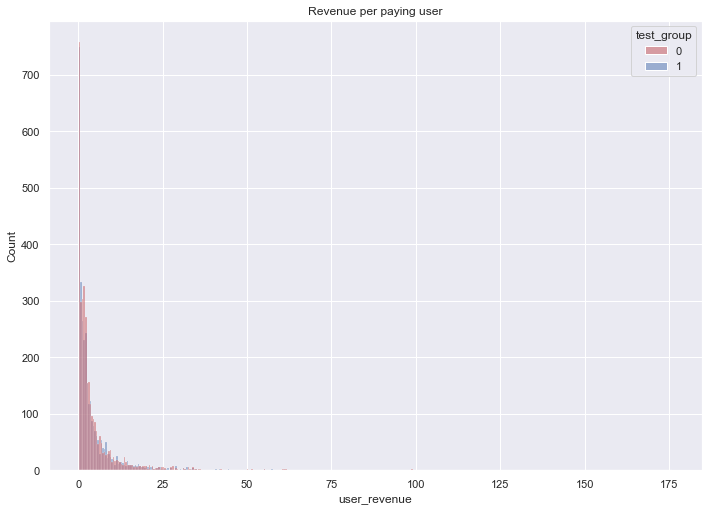

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df_paying,
    x='user_revenue', 
    hue='test_group', 
    palette = ['r', 'b'],
    alpha=0.5,
    kde=False).set(title='Revenue per paying user')

Гистплот показывает ассиметричное распределение данных с сильным закосом в левую сторону. Сделаем логарифмирование

In [12]:
#Логарифмирование
df_paying['revenue_log'] = np.log(df_paying['user_revenue'])

<ipython-input-12-5acc673b2dd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paying['revenue_log'] = np.log(df_paying['user_revenue'])


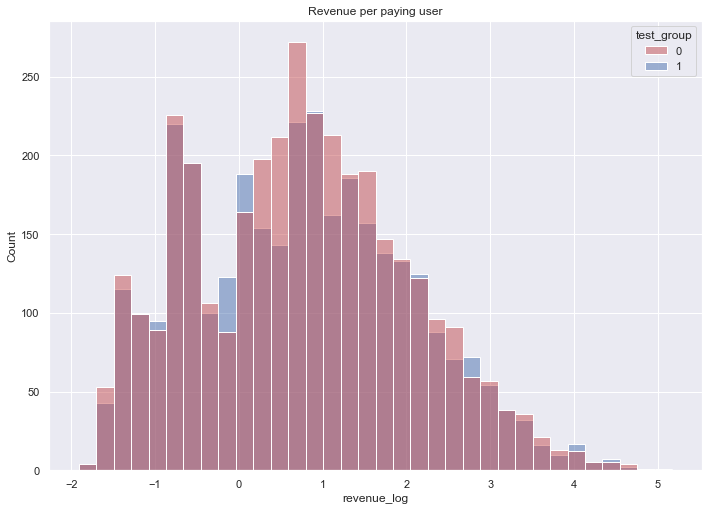

In [13]:
#Гистплот с логарифмированием
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups_log = sns.histplot(data = df_paying, 
    x='revenue_log', 
    hue='test_group', 
    palette = ['r', 'b'],
    alpha=0.5,
    kde=False).set(title='Revenue per paying user')

# Т-тест на логарифмированных данных

In [14]:
print(stats.ttest_ind(df_paying[df_paying.test_group == 0].revenue_log, df_paying[df_paying.test_group == 1].revenue_log, equal_var=False))

Ttest_indResult(statistic=0.5512970528698242, pvalue=0.5814485121103259)


Тут т-тест так же показывает что различия незначимы

# Тест Манна Уитни

In [15]:
print(stats.mannwhitneyu(df_paying[df_paying.test_group == 0].user_revenue,
                df_paying[df_paying.test_group == 1].user_revenue))

print('Отличие не прокрасилось')

A_gt_B = 0

for _ in range(10000):
    A_gt_B+= df_paying[df_paying.test_group == 0].user_revenue.sample().values[0] > df_paying[df_paying.test_group == 1].user_revenue.sample().values[0]
    
print('В', A_gt_B/100, '% случаев A > B. Должно получиться около 50%')

MannwhitneyuResult(statistic=5603249.0, pvalue=0.2483195550822352)
Отличие не прокрасилось
В 49.89 % случаев A > B. Должно получиться около 50%


Манн Уитни говорит что различий нет

# Разделения по гео

In [16]:
control_group = df[df['test_group'] == 0]
test_group = df[df['test_group'] == 1]

In [17]:
#считаем арпу и арппу
def function(df):
    d = {}
    d['arpu'] = df.user_revenue.sum() / df.user_revenue.shape[0]
    def get_user_shape():
        user_shape = df[df.user_payments !=0].user_revenue.shape[0]
        if not user_shape:
            return 1
        return user_shape
    d['arppu'] = df.user_revenue.sum()/get_user_shape()
    def get_paying_users():
        paying_users = df[df.user_payments !=0].user_id.count()
        if not paying_users:
            return 0
        return paying_users
    d['conversion'] = get_paying_users() / df.user_id.count()
    return pd.Series(d, index=['arpu', 'arppu','conversion'])

control_group_geo = control_group.groupby('geo_country').apply(function).reset_index()
test_group_geo = test_group.groupby('geo_country').apply(function).reset_index()

In [18]:
#Удаляем первую строку (там выдает просто 0)
control_group_geo.drop([0], inplace=True)
test_group_geo.drop([0], inplace=True)

In [19]:
test_group_geo_p = test_group_geo[test_group_geo['arpu'] != 0]
control_group_geo_p = control_group_geo[control_group_geo['arpu'] != 0]

# Барплоты по ARPU

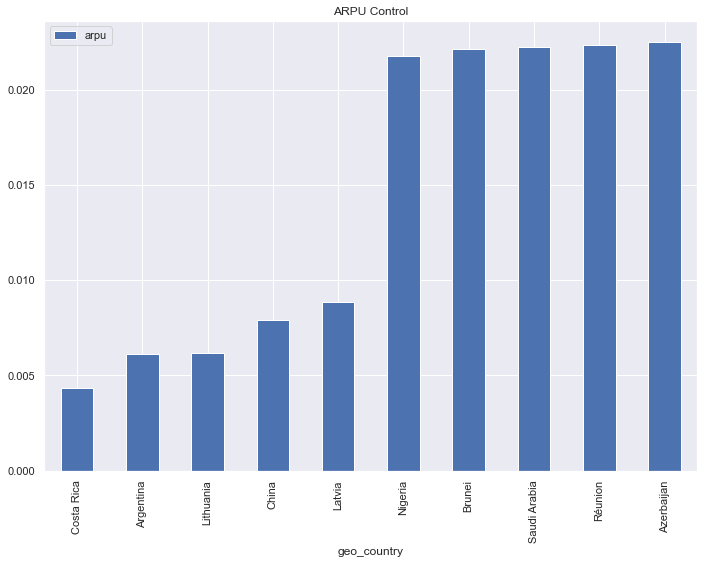

In [20]:
control_group_geo_p.sort_values(by='arpu').reset_index()[:10].plot(kind='bar', x='geo_country', y='arpu',title='ARPU Control');

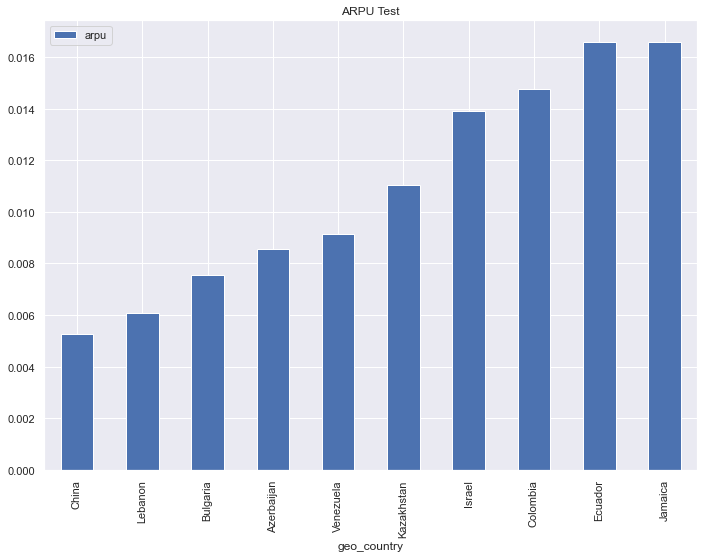

In [21]:
test_group_geo_p.sort_values(by='arpu').reset_index()[:10].plot(kind='bar', x='geo_country', y='arpu', title='ARPU Test');

Мы видим что после внедрения новой фичи у нас обновился список топ стран по ARPU. При этом максимальные значения принадлежат контрольной группе. Это означает что на определенные страны обновление сработало хорошо, а на другие плохо

# Барлоты по ARPPU

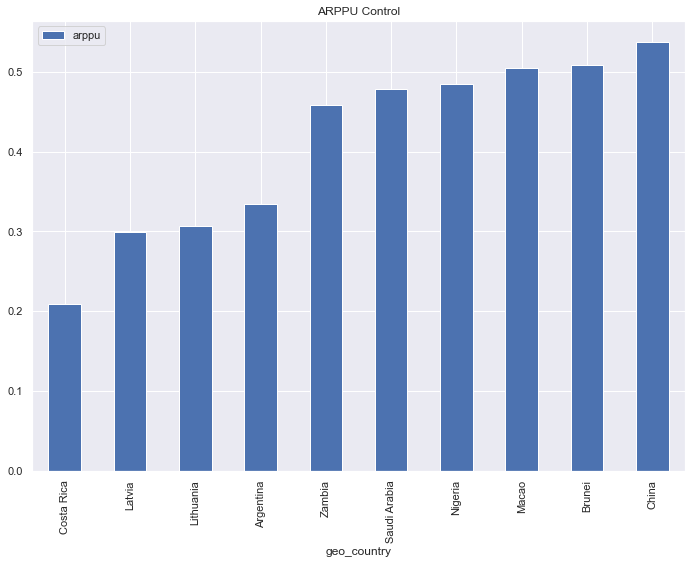

In [22]:
control_group_geo_p.sort_values(by='arppu').reset_index()[:10].plot(kind='bar', x='geo_country', y='arppu',title='ARPPU Control');

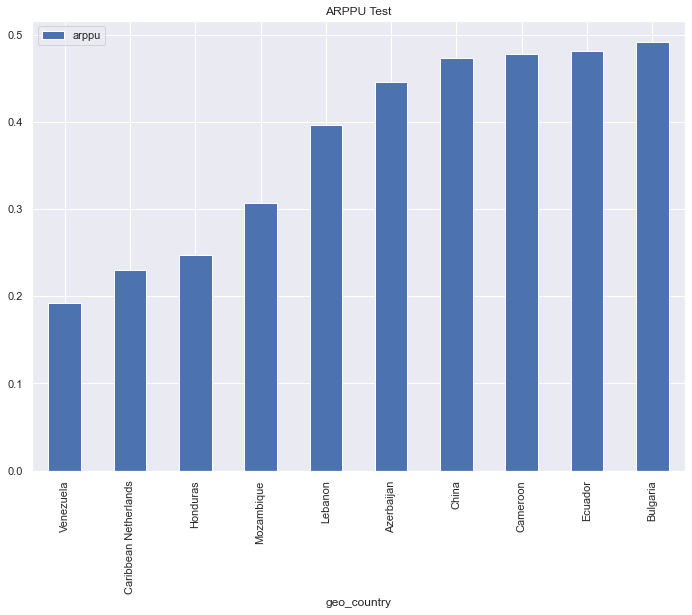

In [23]:
test_group_geo_p.sort_values(by='arppu').reset_index()[:10].plot(kind='bar', x='geo_country', y='arppu', title='ARPPU Test');

Тут так же обновился список топ стран, что говорит что на одни страны это повлияло хорошо, а на другие плохо. Я решил не плотить уже конверсию а просто вывести датафрейм который покажет изменения

# Делаем датафрейм с разницами

In [24]:
control_group_geo_p.set_index('geo_country', inplace=True)
test_group_geo_p.set_index('geo_country', inplace=True)

Ниже код - с очень грубой логикой. Я решил назвать страну победителем если она имеет улучшения по ARPU, ARPPU и конверсии одновременно. Аналогичным способом сделал для лузеров

In [25]:
difference = control_group_geo_p - test_group_geo_p
difference_winners = difference[(difference['arpu'] > 0) & (difference['arppu'] > 0) & (difference['conversion'] > 0)]
difference_losers = difference[(difference['arpu'] < 0) & (difference['arppu'] < 0) & (difference['conversion'] < 0)]

In [26]:
print('Количество стран в выигрыше', difference_winners.shape[0])
print('Количество стран в проигрыше', difference_losers.shape[0])

Количество стран в выигрыше 20
Количество стран в проигрыше 21


Как мы видим - АБ тест как улучшил ситуацию с метриками для некоторых стран, так и ухудшил

In [27]:
#страны с ухудшениями
difference_losers

,arpu,arppu,conversion
geo_country,,,
Argentina,-0.114971,-1.502190,-0.047585
Belgium,-0.045973,-1.122559,-0.002886
Costa Rica,-0.179135,-1.515933,-0.085550
Croatia,-1.273488,-10.195824,-0.081538
Denmark,-0.345691,-2.765108,-0.017839
Finland,-0.131631,-2.667686,-0.002165
Kuwait,-0.237042,-3.641989,-0.021224
Latvia,-1.335689,-29.951552,-0.015033
Lithuania,-0.053918,-0.833901,-0.032632


In [28]:
#страны с улучшениями
difference_winners

,arpu,arppu,conversion
geo_country,,,
Angola,0.176237,1.845687,0.007576
Australia,0.118647,0.613201,0.008289
Bulgaria,0.026486,0.107995,0.041434
China,0.002651,0.064702,0.003595
Cyprus,0.414605,2.661596,0.057143
Dominican Republic,0.017350,0.264889,0.008517
Ecuador,0.239348,2.846304,0.042440
Hong Kong,0.254782,3.139612,0.022598
India,0.023800,0.725282,0.003117


# Заключение

Статистические тесты, математические подсчеты и визуализация показали, что серьезных отношений между иследуемыми группами - нет, если рассматривать генеральную выборку

Если смотреть на данные в разрезе гео, то мы можем увидеть, что для каких то стран ситуация с метриками улучшилась, а для каких то - ухудшилась

Используя наблюдения выше я бы не рекомендовал выпускать обновления в прод, так как существенного изменения в показателях мы не добились. Кроме того, мы ухудшили метрики для некоторых стран

Я бы посоветовал разобраться в причинах ухудшения и улучшения показателей, допилить алгоритм и потом снова делать АБ тест и если он покажет лучшие результаты - думать о том чтобы выкатывать егов  прод